In [309]:
"""
Привет! 

Меня зовут Олег, и это мой пет-проект, в котором я анализирую дата-сет с данными о продажах видеоигр с 1980г. по 2016г.

Структура работы следующая:
1. Описательная статистика
    1.1 Распределение величин
    1.2 Меры центральной тенденции
2. Эксплоративный анализ
    2.1 Анализ компаний и их продаж
    2.2 Анализ игр
    
Приятного изучения!

"""

'\nПривет! \n\nМеня зовут Олег, и это мой пет-проект, в котором я анализирую дата-сет с данными о продажах видеоигр.\nСтруктура работы следующая:\n1. Описательная статистика\n    1.1 Распределение величин\n    1.2 Меры центральной тенденции\n2. Эксплоративный анализ\n    2.1 Анализ компаний и их продаж\n    2.2 Анализ игр\n    \nПриятного изучения!\n'

In [308]:
# Вначале необходимо импортировать библиотеки, которые я буду использовать для работы: 
# pandas - для анализа, seaborn - для визуализации

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
# Загрузка данных:

game_df = pd.read_csv(r'C:\Users\User\Desktop\vgsales.csv')

# Проведем первичную обработку данных: очистим датафрейм от нерелеватной инофрмации, приведем ее к удобному виду.
game_df.columns = game_df.columns.str.lower()
game_df = game_df.query('year <= 2016').dropna()
game_df.year = game_df.year.astype(int)
del game_df['rank']

#Взглянем на структуру датафрейма
game_df.head()

# Датафрейм содержит информацию о наименовании игры, платформе, годе выпуска, жанре, издателе, а также о рынках продаж:
# продажи в Северной Америке, Европе, Японии, остальных странах 

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [312]:
#Посмотрим на описательную статистику

descr_df = game_df.describe().drop('count')
del descr_df['year']
descr_df = round(descr_df,2)
descr_df

# Первая строка говорит о среднем значении по каждому рынку продаж. Поскольку последний столбец является агрегирующим, 
# то наибольшее среднее значение наблюдается в Северной Америке, минимальное в Японии. Строка "std" содержит информа -
# - цию о стандартном отклонении выборки. Чем оно выше, тем больший разброс значений продаж. Посмотрим на строку "50%",
#  она показывает величину, при которой половина наблюдений (игр) находятся слева от нее, а другая половина справа, иными
# словами 50% игр были проданы на сумму, менее чем 0.17 млн долл каждая, а половина больше. Теперь мы понимаем, что величина
# даже в 0.5 млн долл явление довольно редкое.

,na_sales,eu_sales,jp_sales,other_sales,global_sales
mean,0.27,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.57
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.04,0.48
max,41.49,29.02,10.22,10.57,82.74


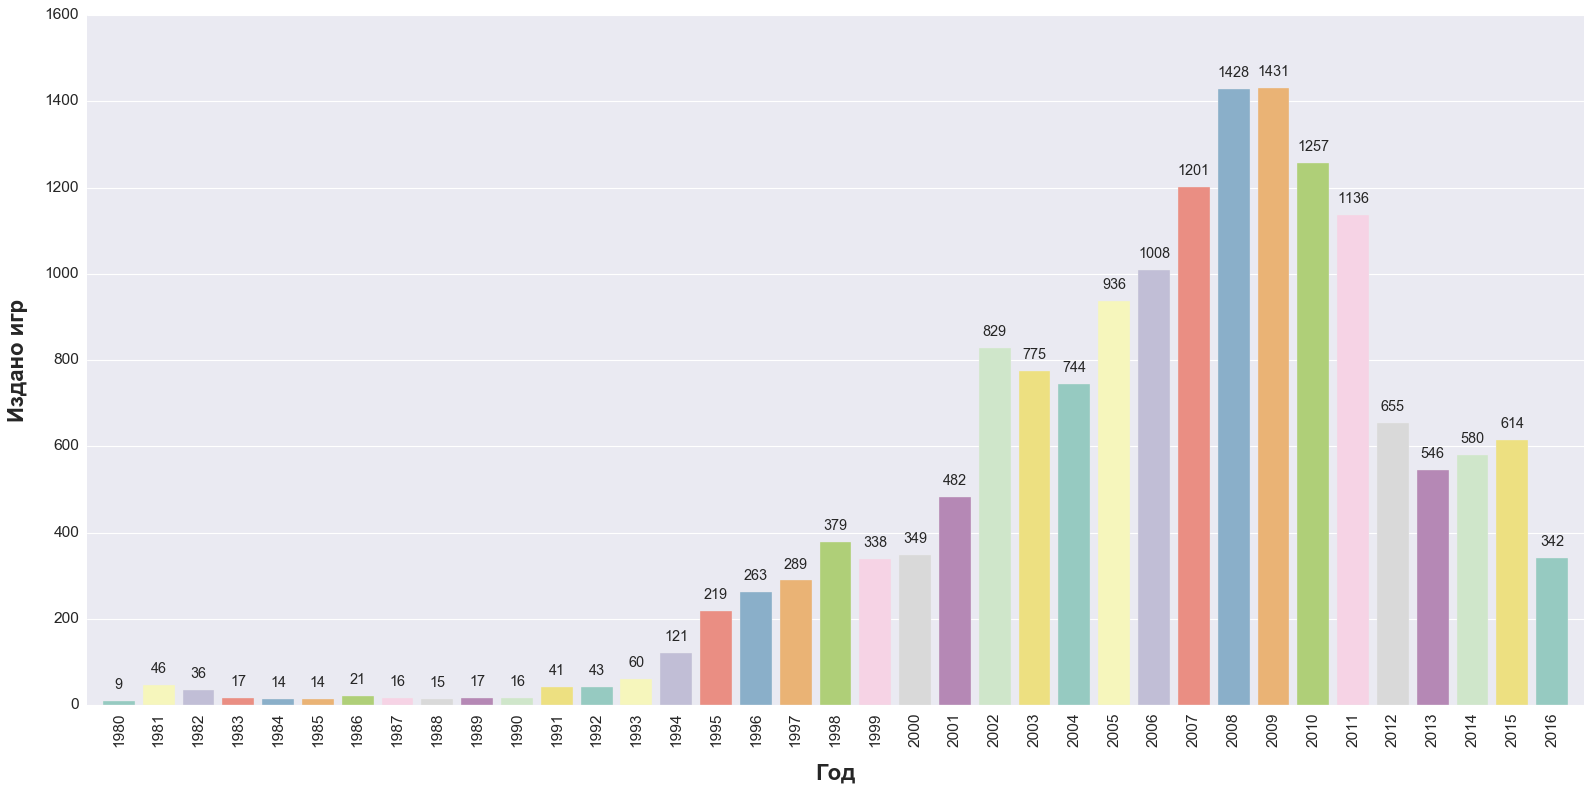

In [314]:
# Пришло время приступить к эксплоративному анализу данных, в рамках которого я буду давать ответы на интересующие меня вопросы.

# Первым делом, я бы хотел посмотреть на динамику рынка игр за данный диапазон времени. 
# Построю график, который отражает количество игр, выпущенных за каждый год

plt.style.use('seaborn')
plt.figure(figsize=(20, 10))
games_over_years = game_df.groupby('year',as_index = False).agg({'name' : 'count'})\
       .rename(columns = {'name' : 'games_released'})\
       .sort_values('year', ascending = True)
plot = sns.barplot(x = 'year', y = 'games_released', data = games_over_years, palette = 'Set3')
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plot.set_xlim(left = -0.8, right = 36.8)
plot.bar_label(plot.containers[0], padding = 8, fontsize = 13)
plot.set_ylabel('Издано игр', fontsize = 20, labelpad = 15, fontweight = 800)
plot.set_xlabel('Год', fontsize = 20, labelpad = 15, fontweight = 800)
plt.tight_layout()
plt.savefig('График распределения лет.png')
plt.show()

# По нему мы можем понять, что:
# а) бурный рост рынка начался примерно в 1994 г.
# б) пик выпуска игр пришелся на период 2007 - 2010 г.
# в) после 2011 г. наблюдается спад рынка игр

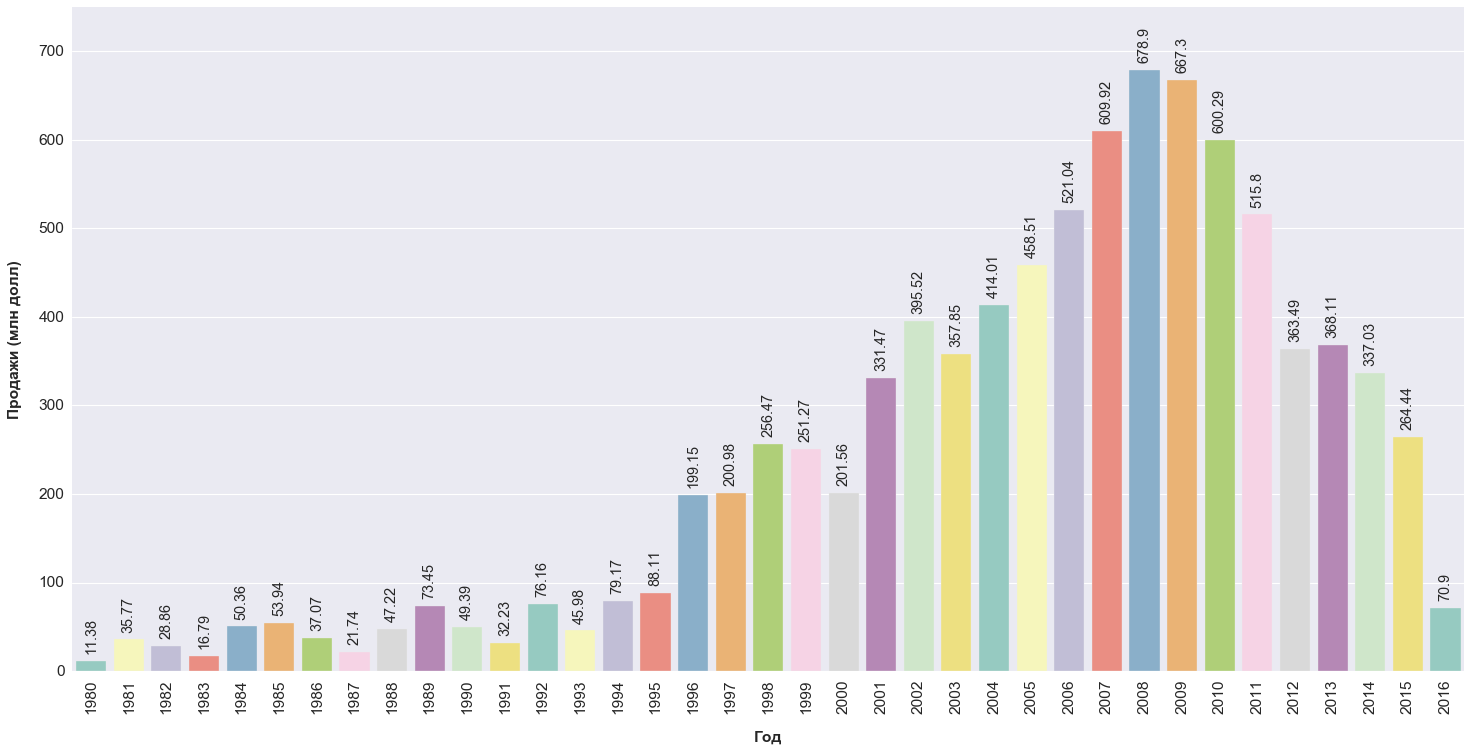

In [318]:
# Следующим шагом, я хочу посмотреть, как рос рынок в разрезе продаж.

sales_over_years = game_df.groupby('year', as_index = False)\
       .agg({'global_sales' : 'sum'})\
       .sort_values('year', ascending = True)\
       .reset_index(drop = True)
plt.figure(figsize = (20, 10))
plot = sns.barplot(x = 'year', y = 'global_sales', data = sales_over_years, palette = 'Set3')
plot.bar_label(plot.containers[0], padding = 7, rotation = 90, fontsize = 13)
plot.set_ylim(top = 750)
plot.set_ylabel('Продажи (млн долл)', fontsize = 14, labelpad = 15, fontweight = 800)
plot.set_xlabel('Год', fontsize = 14, labelpad = 15, fontweight = 800)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#Можно заметить, что график идентичен предыдущему: пик, рост и спад наблюдаются в тех же диапазонах

In [326]:
#Интересно, во что любили больше всего играть люди в прошлом? Какие игры были самыми популярными в каждом году?

top_game = game_df.groupby(['year', 'name']).agg({'global_sales' : 'sum'})
g = top_game['global_sales'].groupby('year', group_keys = False)
top_game_by_year = pd.DataFrame(g.nlargest(1))
top_game_by_year.reset_index()

,year,name,global_sales
0,1980,Asteroids,4.31
1,1981,Pitfall!,4.50
2,1982,Pac-Man,7.81
3,1983,Baseball,3.20
4,1984,Duck Hunt,28.31
5,1985,Super Mario Bros.,40.24
6,1986,The Legend of Zelda,6.51
7,1987,Zelda II: The Adventure of Link,4.38
8,1988,Super Mario Bros. 3,17.28
9,1989,Tetris,30.26


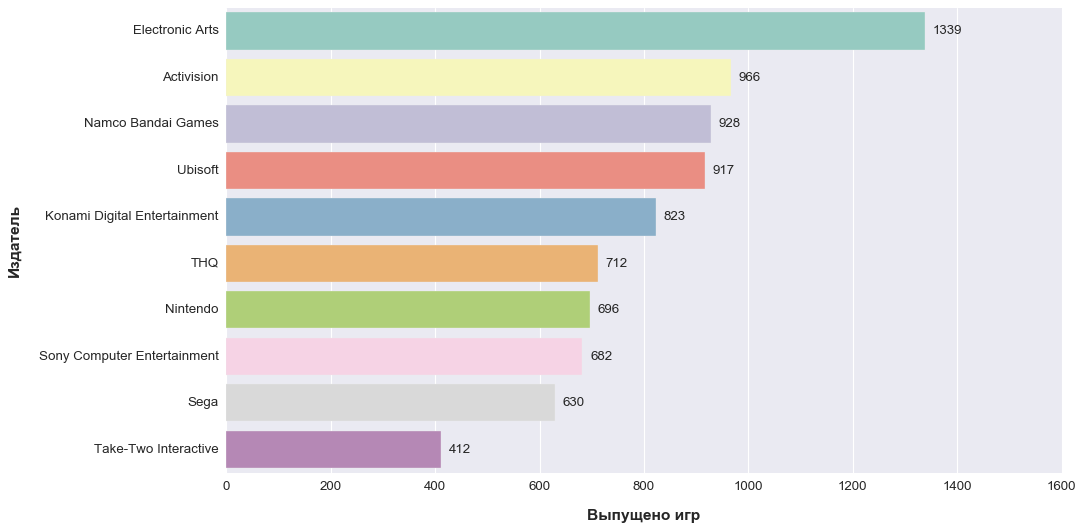

In [320]:
# Перейдем к участникам рынка игр. Давайте взглянем на ТОП-10 издателей по кол-ву выпущенных игр

top_10_publisher = game_df.groupby('publisher', as_index = False)\
                          .agg({'name' : 'count'})\
                          .rename(columns = {'name' : 'released_games'})\
                          .sort_values('released_games', ascending = False).head(10).reset_index(drop = True)
plt.figure(figsize = (12,7))
plot = sns.barplot(x = 'released_games', y = 'publisher', data = top_10_publisher, palette = 'Set3')
plot.bar_label(plot.containers[0], padding = 7, fontsize = 12)
plot.set_xlim(right = 1600)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plot.set_ylabel('Издатель', fontsize = 14, labelpad = 15, fontweight = 800)
plot.set_xlabel('Выпущено игр', fontsize = 14, labelpad = 15, fontweight = 800)
plt.show()
# Впереди оказались компании, которые у всех на слуху

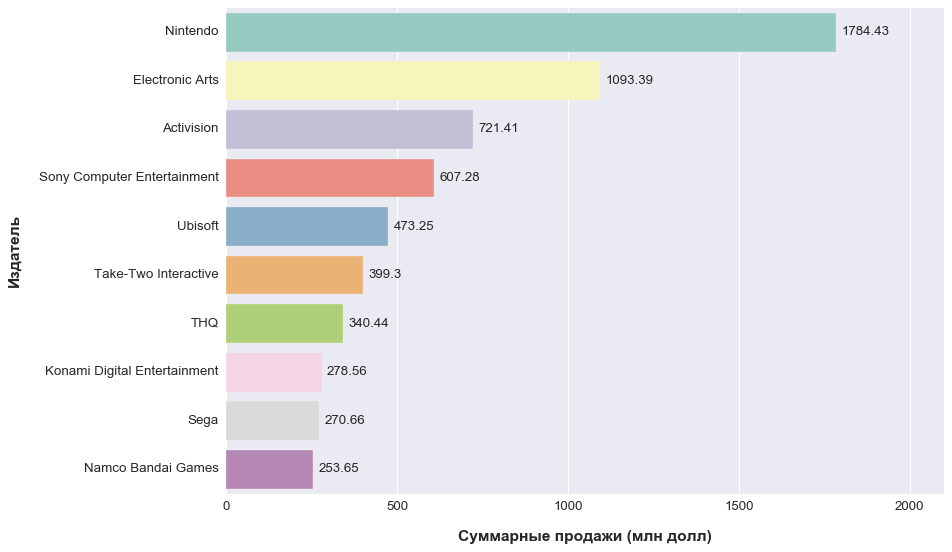

In [321]:
# Теперь посмотрим на лидеров рынка по объему продаж.

top_sales = game_df.groupby('publisher',as_index = False)\
       .agg({'global_sales' : 'sum'})\
       .sort_values('global_sales', ascending = False)\
       .head(10) \
       .reset_index(drop = True)
plt.figure(figsize = (12,7))
plot = sns.barplot(x = 'global_sales' , y = 'publisher', data = top_sales, palette = 'Set3')
plot.bar_label(plot.containers[0], padding = 5, fontsize = 12)
plot.set_xlim(right = 2100)
plot.set_ylabel('Издатель', fontsize = 14, labelpad = 15, fontweight = 800)
plot.set_xlabel('Суммарные продажи (млн долл)', fontsize = 14, labelpad = 15, fontweight = 800)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig('ТОП-10 компаний по продажам за все время.png')
plt.show()

# Мы видим нечто интересное: компания Nintendo, которая в прошлом рейтинге находилась на 7-ом месте, является лидером по 
# продажам со значительным опережением. Остальные компании остались приблизительно на своих местах.

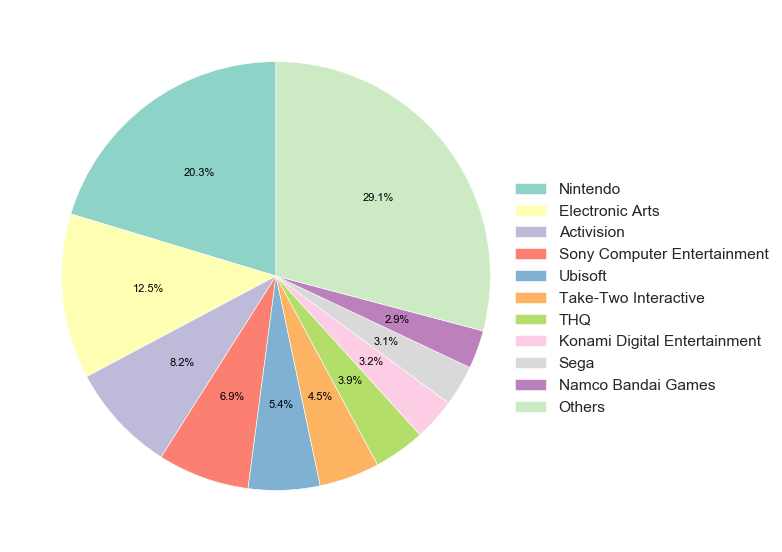

In [322]:
#Построим график, который показывает доли рынка ТОП-10 издателей. Остальных издателей сгруппируем и назовем "Others"

others_share = 0
others_sales = 0
share_df = game_df.groupby('publisher',as_index = False).agg({'global_sales' : 'sum'})
share_df['share'] = round((share_df.global_sales/share_df.global_sales.sum()).mul(100),2)
share_df
top_10_list = [i for i in share_df.sort_values('share', ascending = False).head(10).publisher]
for i in share_df.publisher:
    if i not in top_10_list:
        x = share_df.index[share_df.publisher == i][0]
        others_share += share_df.iloc[x].share
        others_sales += share_df.iloc[x].global_sales
    else:
        continue
total_share = share_df.sort_values('share', ascending = False).head(10).reset_index(drop = True)
total_share.loc[len(total_share.index)] = ['Others', others_sales, others_share]
fig, ax = plt.subplots(figsize=(12, 7))
plot = plt.pie(x = total_share.share, colors = sns.color_palette('Set3'), \
               autopct='%1.1f%%', startangle=90, textprops = {'color' : 'black'}, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
plt.legend(labels = total_share.publisher, loc = 'best', bbox_to_anchor=(0.92, 0.7), fontsize = 14)
plt.tight_layout()
plt.savefig('Доля рынка ТОП-10 компаний.png')

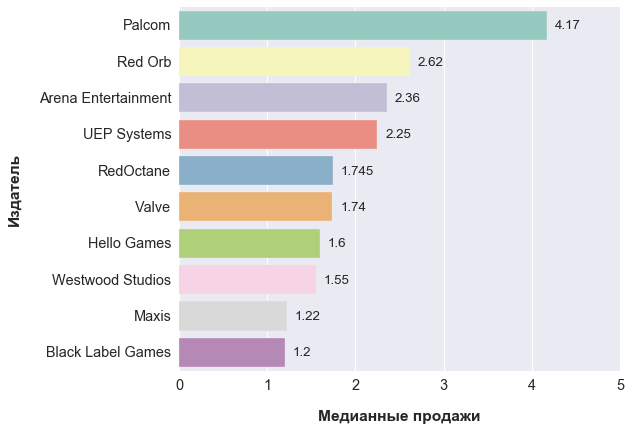

In [325]:
# Конечно, у каждой компании бывают неудачные и легендарные игры, но хочется посмотреть какая из компаний
# является лидером выручки на одну игру.

median_sales_by_publisher = game_df.groupby('publisher',as_index = False).agg({'global_sales' : 'median'})
median_sales_by_publisher = median_sales_by_publisher.sort_values('global_sales', ascending = False)\
                        .reset_index(drop = True)\
                        .head(10)
median_sales_by_publisher = median_sales_by_publisher.rename(columns = {'global_sales' : 'median_sales'})
median_sales_by_publisher
plot = sns.barplot(x = 'median_sales', y = 'publisher', data = median_sales_by_publisher, palette = 'Set3')
plot.set_xlim(right = 5)
plot.bar_label(plot.containers[0], padding = 7, fontsize = 12)
plot.set_ylabel('Издатель', fontsize = 14, labelpad = 15, fontweight = 800)
plot.set_xlabel('Медианные продажи', fontsize = 14, labelpad = 15, fontweight = 800)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.savefig('График распределения лет.png')

# Здесь мы видим совершенно иную картину: ни одной компании из прошлых рейтингов нет в этом. Лидерство в систематичной
# эффективности не за гигантами рынка.

In [327]:
#Теперь давайте посмотрим на самые успешные проекты каждой из студий.

top_game = game_df.groupby(['publisher','name']).agg({'global_sales' : 'sum'})
prep = top_game['global_sales'].groupby('publisher', group_keys = False)
top_game_by_company = pd.DataFrame(prep.nlargest(1)).reset_index().sort_values('global_sales',ascending = False)
top_game_by_company.reset_index(drop = True).head(20)

,publisher,name,global_sales
0,Nintendo,Wii Sports,82.74
1,Take-Two Interactive,Grand Theft Auto V,55.92
2,Activision,Call of Duty: Modern Warfare 3,30.83
3,Microsoft Game Studios,Kinect Adventures!,21.82
4,Bethesda Softworks,The Elder Scrolls V: Skyrim,19.28
5,Electronic Arts,FIFA 15,19.02
6,LucasArts,LEGO Star Wars: The Complete Saga,15.75
7,Sony Computer Entertainment,Gran Turismo 3: A-Spec,14.98
8,Sega,Mario & Sonic at the Olympic Games,13.20
9,Ubisoft,Assassin's Creed IV: Black Flag,13.16


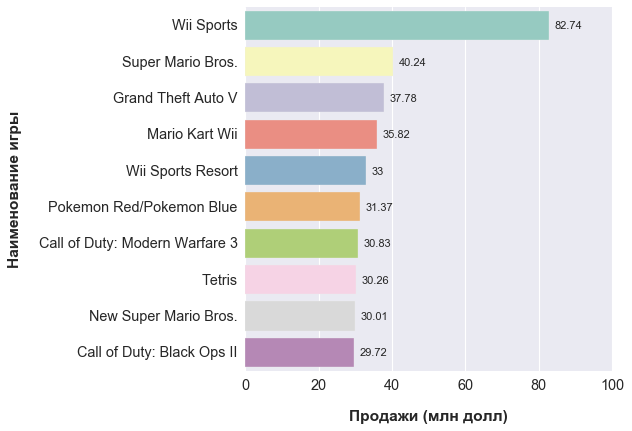

In [329]:
# Перейдем к рассмотрению непосредственно игр. Какие игры пользуются наибольшим успехом?

top_10_games = game_df.groupby(['name','publisher','year'],as_index = False)\
       .agg({'global_sales' : 'sum'})\
       .sort_values('global_sales', ascending = False)\
       .head(10).reset_index(drop = True)
plot = sns.barplot(x = 'global_sales', y = 'name', data = top_10_games, palette = 'Set3')
plot.set_xlim(right = 100)
plot.bar_label(plot.containers[0], padding = 5)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plot.set_ylabel('Наименование игры', fontsize = 14, labelpad = 15, fontweight = 800)
plot.set_xlabel('Продажи (млн долл)', fontsize = 14, labelpad = 15, fontweight = 800)
plt.tight_layout()
plt.savefig('Самые продаваемые игры.png')

# Wii Sports от Nintendo - абсолютный лидер с продажами 82.74 млн долл. Хочу напомнить, что 75% игр 
# не доходят даже до отметки 0.5 млн долл

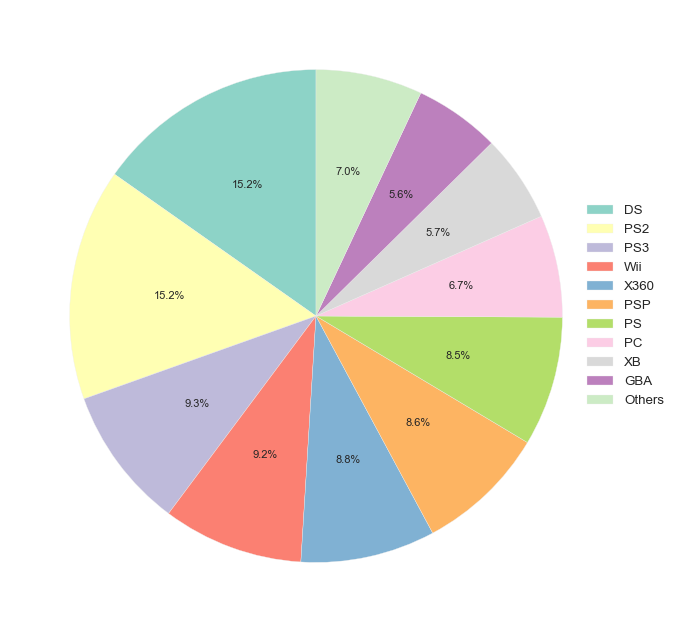

In [330]:
#На какие платформы компании чаще всего выпускают игры?

others = 0
prep = game_df.groupby('platform', as_index = False)\
                     .agg({'name' : 'count'})\
                     .sort_values('name', ascending = False)
prep['name'] = round((prep.name/prep.name.sum().astype(float)).mul(100),2)
top = [i for i in prep.head(10).platform]
for i in prep.platform:
    if i not in top:
        index = prep.index[prep.platform == i][0]
        others_share = prep.iloc[index].name
platform_df = prep.rename(columns = {'name' : 'share'}).head(10).reset_index(drop = True)
platform_df.loc[len(platform_df.index)] = ['Others', others_share]
plt.figure(figsize=(10, 8))
plot = plt.pie(x = platform_df.share, colors = sns.color_palette('Set3'), \
               autopct='%1.1f%%', startangle=90)
plt.legend(labels = platform_df.platform, loc = 'best', bbox_to_anchor=(0.92, 0.7), fontsize = 12)
plt.tight_layout()
plt.savefig('Популярность платформ.png')
plt.show()

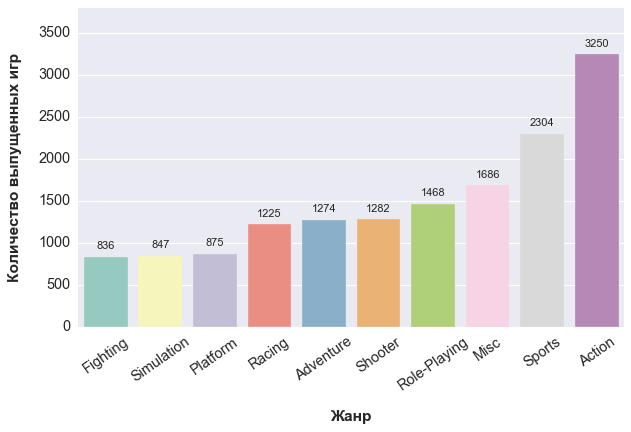

In [331]:
# А в каких жанрах?

top_10_genre = game_df.groupby('genre', as_index = False)\
       .agg({'name' : 'count'})\
       .sort_values('name', ascending = True)\
       .tail(10).rename(columns = {'name' : 'games'}).reset_index(drop = True)
plot = sns.barplot(x = 'genre', y = 'games', data = top_10_genre, palette = 'Set3')
plot.bar_label(plot.containers[0], padding = 5)
plot.set_ylim(top = 3800)
plt.xticks(rotation = 35, fontsize = 13)
plt.yticks(fontsize = 13)
plot.set_ylabel('Количество выпущенных игр', fontsize = 14, labelpad = 15, fontweight = 800)
plot.set_xlabel('Жанр', fontsize = 14, labelpad = 15, fontweight = 800)
plt.tight_layout()
plt.savefig('Количество выпущенных игр на платформах.png')
plt.show()

In [332]:
# Интересно, а различаются ли предпочтения в жанрах игр у жителей разных регионов?

markets_per_genre = game_df.groupby('genre')\
       .agg({'na_sales' : 'sum', 'eu_sales' : 'sum', 'jp_sales' : 'sum', 'other_sales' : 'sum'})
for i in markets_per_genre.columns:
    markets_per_genre[i] = round((markets_per_genre[i]/markets_per_genre[i].sum()).astype(float).mul(100),2)
markets_per_genre = markets_per_genre.reset_index()
markets_per_genre

# Мы видим, например, что во всем мире, кроме Японии лидирует жанр "Action", в то время, как в Японии 
# лидерство принадлежит жанру "Role-Playing"

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,19.91,21.46,12.35,23.44
1,Adventure,2.36,2.65,4.05,2.12
2,Fighting,5.10,4.16,6.79,4.59
3,Misc,9.17,8.80,8.31,9.37
4,Platform,10.31,8.34,10.17,6.53
5,Puzzle,2.82,2.10,4.41,1.58
6,Racing,8.25,9.82,4.41,9.72
7,Role-Playing,7.54,7.79,27.27,7.53
8,Shooter,13.29,12.90,2.97,12.92
9,Simulation,4.19,4.70,4.95,3.97


In [ ]:
"""
На этом мой анализ дата - сета подошел к концу. Для меня это была интересная работа, которая дала множество инсайтов. 
Спасибо, что дошли до конца!

tg: @lovipoputnuiveter
phone: +7(983)144-83-68
email: propertiesofliving@gmail.com
"""